# Numerical Analysis for Non-Linear Optimization
## Module 1: Lecture Summaries

---

# Random Number Generators
### Implementation and Applications

- **Key Concepts:**
  - Role of RNGs in **Monte Carlo simulations, machine learning, and statistical analysis**
  - **NumPy PRNG API** for efficient random number generation
  - **Secure random numbers** using Python's `secrets` module

- **Statistical Testing & Validation:**
  - Kolmogorov-Smirnov Test
  - Histogram analysis for distribution verification

---

In [1]:
import numpy as np
from scipy.stats import kstest

rng = np.random.default_rng(42)
samples = rng.random(1000)
ks_stat, p_value = kstest(samples, "uniform")
print(f"KS Test Statistic: {ks_stat}, P-value: {p_value}")

KS Test Statistic: 0.022093132123466364, P-value: 0.7048429933196632


---

- **Monte Carlo Simulations:**
  - Estimating π using random sampling
  - Convergence analysis with increasing samples

---

In [2]:
from numba import njit, prange


@njit(parallel=True)
def monte_carlo_pi(n):
    count = 0
    for i in prange(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            count += 1
    return (count / n) * 4


print("Estimated Pi:", monte_carlo_pi(1000000))

Estimated Pi: 3.142092


---

# Moment Control Techniques
### Best Samples, Antithetic Variables & Control Variates

- **Variance Reduction Methods:**
  - **Best Samples:** Importance and stratified sampling
  - **Antithetic Variables:** Creating negatively correlated pairs
  - **Moment Control Techniques:** Matching expected values to improve efficiency

---

In [3]:
import numpy as np


def monte_carlo_pi_antithetic(n):
    u = np.random.random(n // 2)
    v = 1 - u
    x = np.concatenate((u, v))
    y = np.random.random(n)
    inside_circle = (x**2 + y**2) <= 1
    return (np.sum(inside_circle) / n) * 4


print("Estimated Pi:", monte_carlo_pi_antithetic(1000000))

Estimated Pi: 3.14016


- **Applications:**
  - Monte Carlo pricing of **European call options**
  - **Risk analysis (Value at Risk - VaR)**
  - Path simulation in **stochastic differential equations**

---

In [4]:
import numpy as np


def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T
    U = np.random.normal(0, 1, num_simulations // 2)
    V = -U
    Z = np.concatenate((U, V))
    ST = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff = np.maximum(ST - K, 0)
    discounted_payoff = np.exp(-r * T) * payoff
    return np.mean(discounted_payoff), np.std(discounted_payoff) / np.sqrt(
        num_simulations
    )


print(monte_carlo_european_call(100, 100, 1, 0.05, 0.2, 100000))

(np.float64(10.425973641556155), np.float64(0.046368762764608225))


---

# Pseudo & Quasi-Random Numbers
### Differences, Generation, and Applications

- **Pseudo-Random Numbers (PRNs)**
  - Deterministic, reproducible, periodic (e.g., **Mersenne Twister, PCG**)

- **Quasi-Random Numbers (QRNs)**
  - Low-discrepancy sequences (e.g., **Sobol, Halton, Faure**)
  - Used for **numerical integration & optimization**

---

In [5]:
from scipy.stats.qmc import Sobol

sobol = Sobol(d=2, scramble=False)
quasi_random_points = sobol.random(n=10)
print(quasi_random_points)

[[0.     0.    ]
 [0.5    0.5   ]
 [0.75   0.25  ]
 [0.25   0.75  ]
 [0.375  0.375 ]
 [0.875  0.875 ]
 [0.625  0.125 ]
 [0.125  0.625 ]
 [0.1875 0.3125]
 [0.6875 0.8125]]


/home/julihocc/ma2008b/notes.worktrees/FJ2025/.venv/lib/python3.10/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


- **Monte Carlo Integration with PRNs vs QRNs**

---

In [6]:
from scipy.stats.qmc import Halton


def monte_carlo_integral_qrn(f, a, b, n):
    halton = Halton(d=1, scramble=False)
    x = halton.random(n) * (b - a) + a
    return (b - a) * np.mean(f(x))


def f(x):
    return np.exp(-(x**2))


print("Monte Carlo Integral (QRN):", monte_carlo_integral_qrn(f, 0, 1, 10000))

Monte Carlo Integral (QRN): 0.7469319729301906


---

# Taylor & Maclaurin Series
### Function Approximation & Optimization

- **Taylor Series Expansion:**
  - Approximation of functions using polynomial expansions
  - Error control through higher-order terms

---

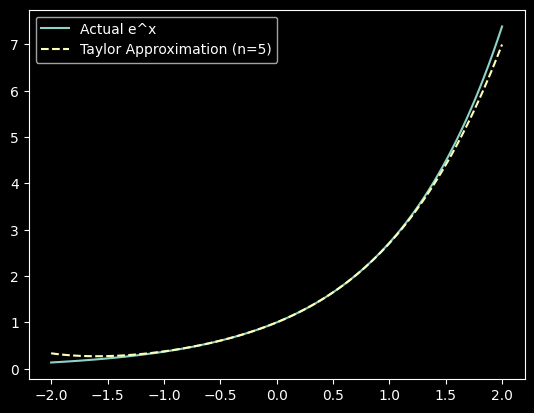

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial


def taylor_expansion_e_x(x, n_terms):
    return sum([(x**n) / factorial(n) for n in range(n_terms)])


x_values = np.linspace(-2, 2, 100)
y_actual = np.exp(x_values)
y_approx = [taylor_expansion_e_x(x, 5) for x in x_values]

plt.plot(x_values, y_actual, label="Actual e^x")
plt.plot(x_values, y_approx, "--", label="Taylor Approximation (n=5)")
plt.legend()
plt.show()

---

# Conclusion

- RNGs are essential in **scientific computing & simulations**
- Variance reduction methods enhance **Monte Carlo efficiency**
- **Quasi-random sequences** outperform PRNGs in integration tasks
- **Taylor/Maclaurin series** provide powerful function approximations

---

# Thank You! 🎯
**Questions?**